<a href="https://colab.research.google.com/github/Rathod07/MeniscusAttentionMechUnet/blob/main/MedialMeniscusAttention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import nibabel as nib

# Your configured path
NIFTI_ROOT = os.path.normpath(r"F:\\skm-tea-data\\Named Raw Segmented Data")

# Track all unique classes across the dataset
all_classes = set()

for fname in os.listdir(NIFTI_ROOT):
    if fname.endswith(".nii") or fname.endswith(".nii.gz"):
        path = os.path.join(NIFTI_ROOT, fname)
        try:
            mask = nib.load(path).get_fdata()
            unique_vals = np.unique(mask)
            all_classes.update(unique_vals)
            print(f"{fname}: {unique_vals}")
        except Exception as e:
            print(f"Error reading {fname}: {e}")

print("\nAll unique labels across dataset:", sorted(all_classes))


MTR_001.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_005.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_006.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_008.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_010.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_013.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_015.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_016.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_018.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_019.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_020.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_023.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_026.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_028.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_030.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_033.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_034.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_037.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_038.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_040.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_043.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_044.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_045.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_046.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_047.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_048.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_049.nii: [0. 1. 2. 3. 4. 5. 6.]
MTR_051.nii: [0. 1. 2. 3. 4.

Found 82 slices with label 2 or 3.


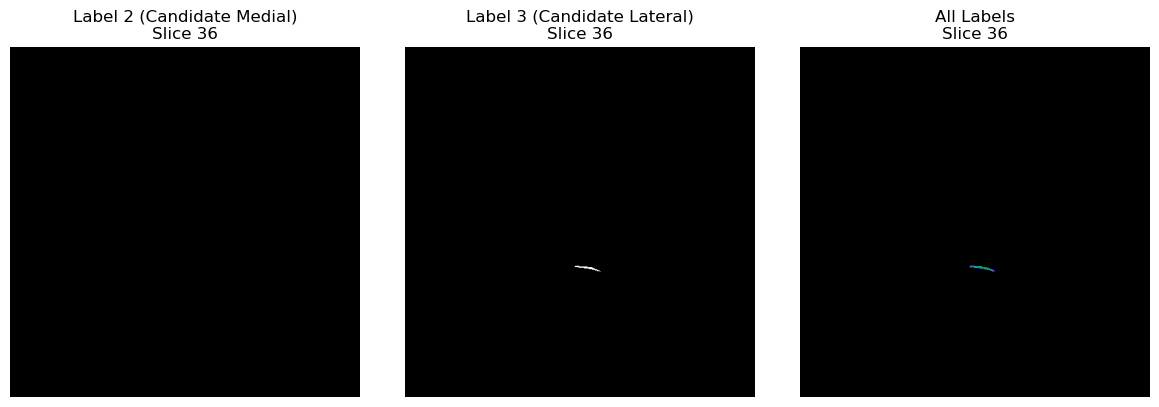

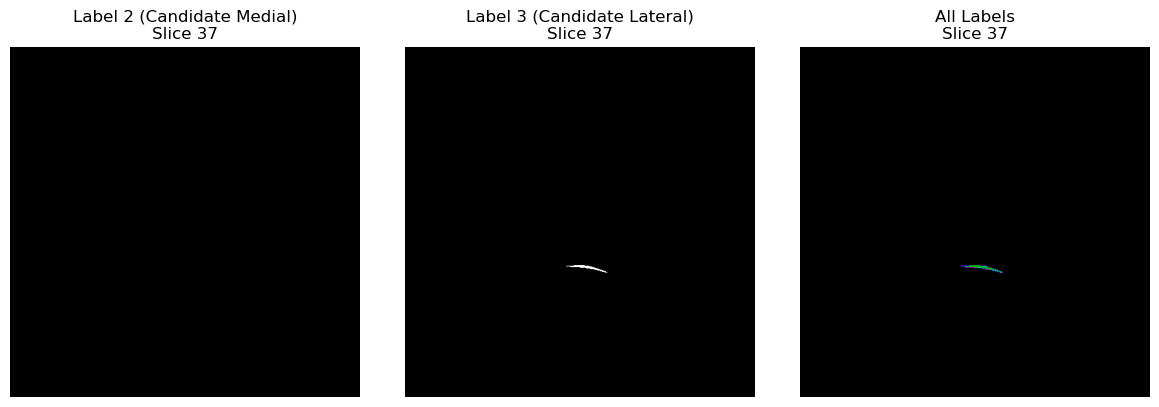

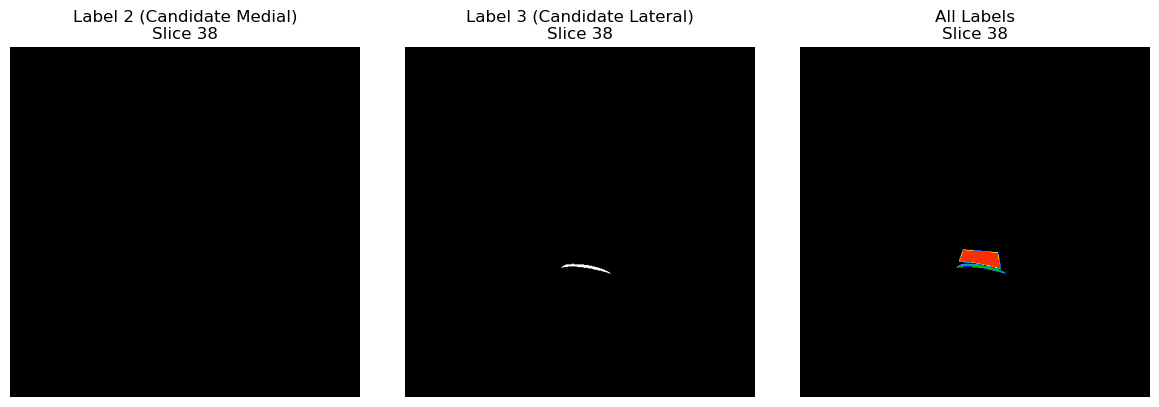

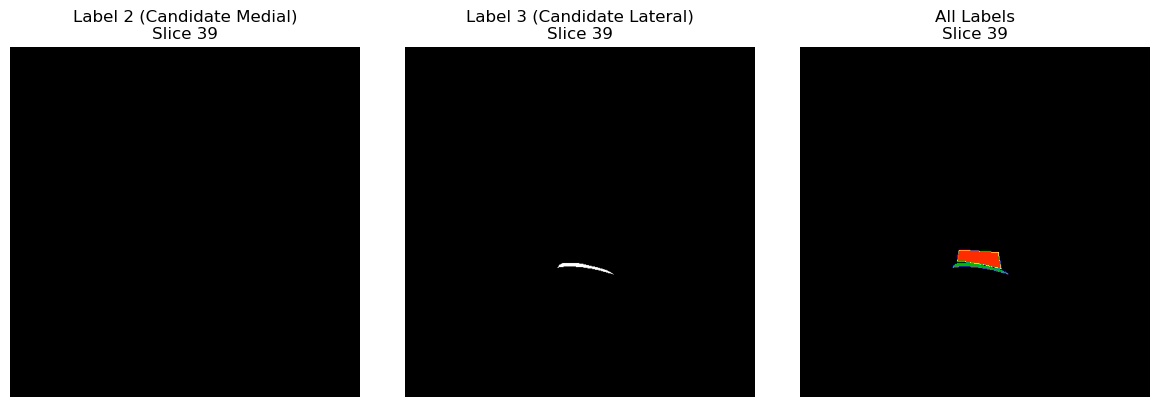

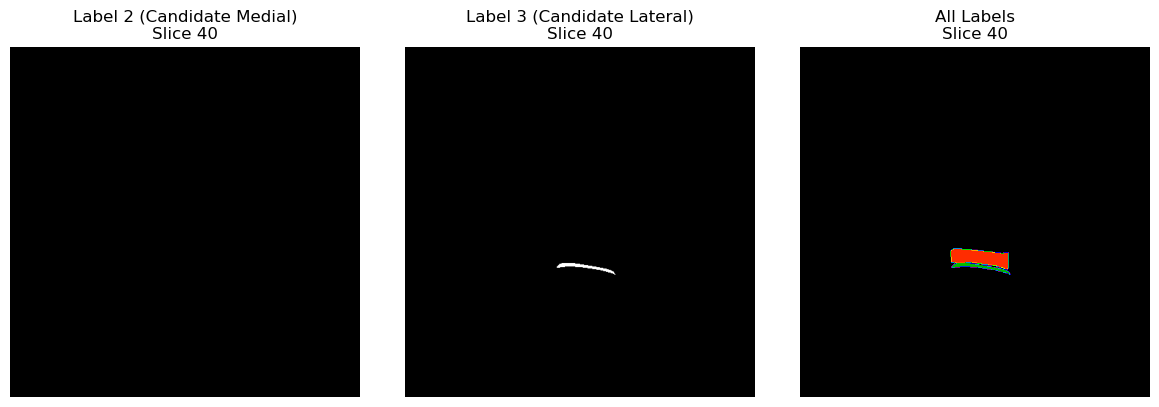

In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# === Step 1: Path Setup ===
NIFTI_ROOT = os.path.normpath(r"F:\\skm-tea-data\\Named Raw Segmented Data")
filename = "MTR_001.nii"  # ← Replace with any available .nii file
nii_path = os.path.join(NIFTI_ROOT, filename)

# === Step 2: Load the 3D mask ===
mask = nib.load(nii_path).get_fdata()  # shape: (H, W, Z)

# === Step 3: Find all slices that contain label 2 or 3 ===
target_slices = []
for z in range(mask.shape[2]):
    if np.any(mask[:, :, z] == 2) or np.any(mask[:, :, z] == 3):
        target_slices.append(z)

print(f"Found {len(target_slices)} slices with label 2 or 3.")

# === Step 4: Display up to 5 of those slices ===
for i, z in enumerate(target_slices[:5]):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow((mask[:, :, z] == 2).astype(float), cmap='gray')
    axs[0].set_title(f"Label 2 (Candidate Medial)\nSlice {z}")
    axs[0].axis('off')

    axs[1].imshow((mask[:, :, z] == 3).astype(float), cmap='gray')
    axs[1].set_title(f"Label 3 (Candidate Lateral)\nSlice {z}")
    axs[1].axis('off')

    axs[2].imshow(mask[:, :, z], cmap='nipy_spectral', vmin=0, vmax=6)
    axs[2].set_title(f"All Labels\nSlice {z}")
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()


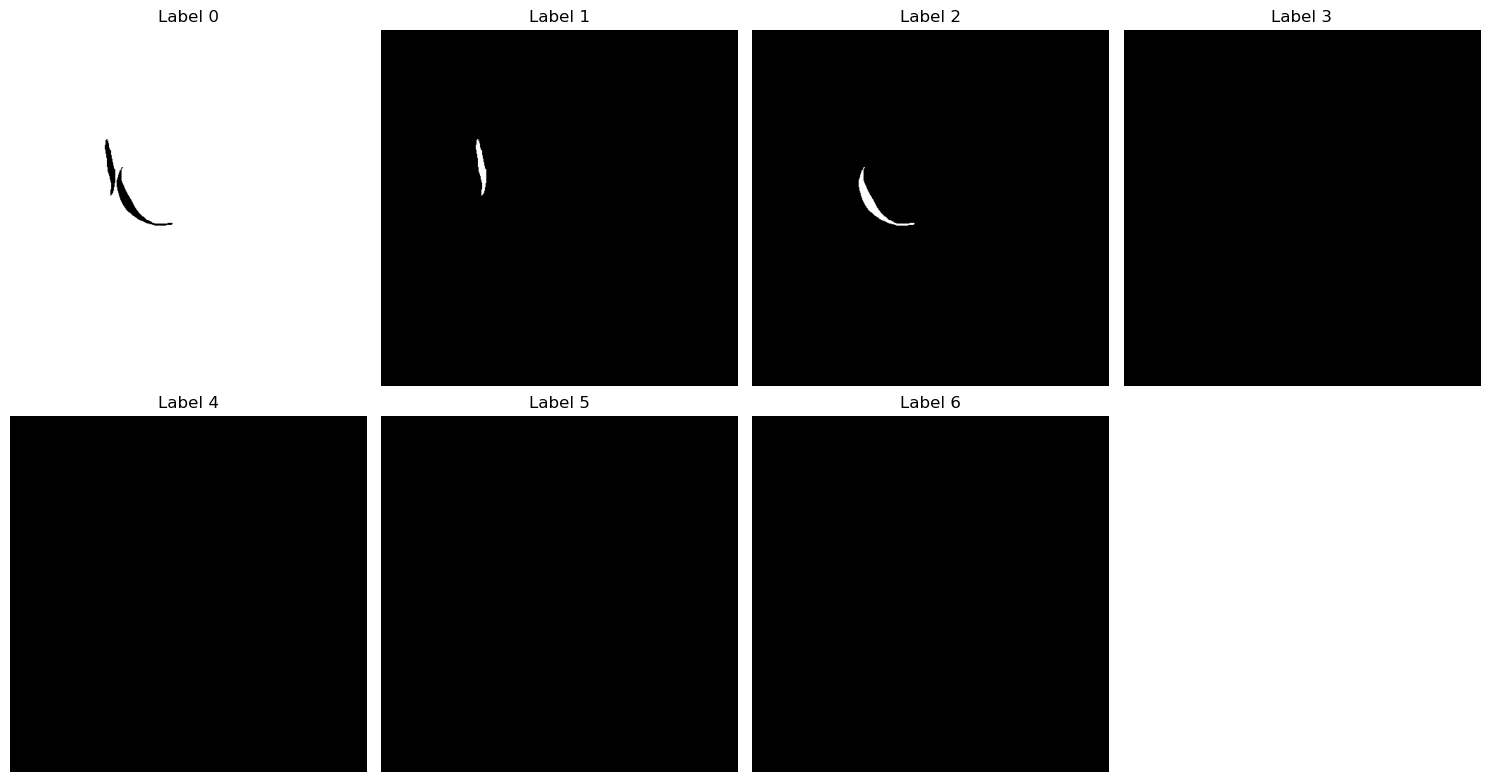

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

nii_path = r"F:\\skm-tea-data\\Named Raw Segmented Data\\MTR_001.nii"
mask = nib.load(nii_path).get_fdata()
labels = np.unique(mask)

plt.figure(figsize=(15, 8))
for i, l in enumerate(labels):
    plt.subplot(2, 4, i + 1)
    slice_ = (mask == l).astype(np.uint8)
    plt.imshow(slice_[:, :, mask.shape[2] // 2], cmap='gray')
    plt.title(f"Label {int(l)}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Processed 60 patients with valid data
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - loss: 0.4782 - mean_io_u_1: 0.4965 - precision_1: 0.0322 - recall_1: 0.5285 - val_loss: 0.4172 - val_mean_io_u_1: 0.4965 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - loss: 0.2168 - mean_io_u_1: 0.4968 - precision_1: 0.3248 - recall_1: 0.1781 - val_loss: 0.2663 - val_mean_io_u_1: 0.4965 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - loss: 0.1653 - mean_io_u_1: 0.5000 - precision_1: 0.5656 - recall_1: 0.2670 - val_loss: 0.1885 - val_mean_io_u_1: 0.4965 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - loss: 0.1386 - mean_io_u_1: 0.4994 - precision_1: 0.6166 - recall_1: 0.4764 - val_loss: 0.1426 - val_mean_io_u_1: 0.4965 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 

Model saved as 'trained_attention_unet.h5'


KeyError: 'mean_io_u'

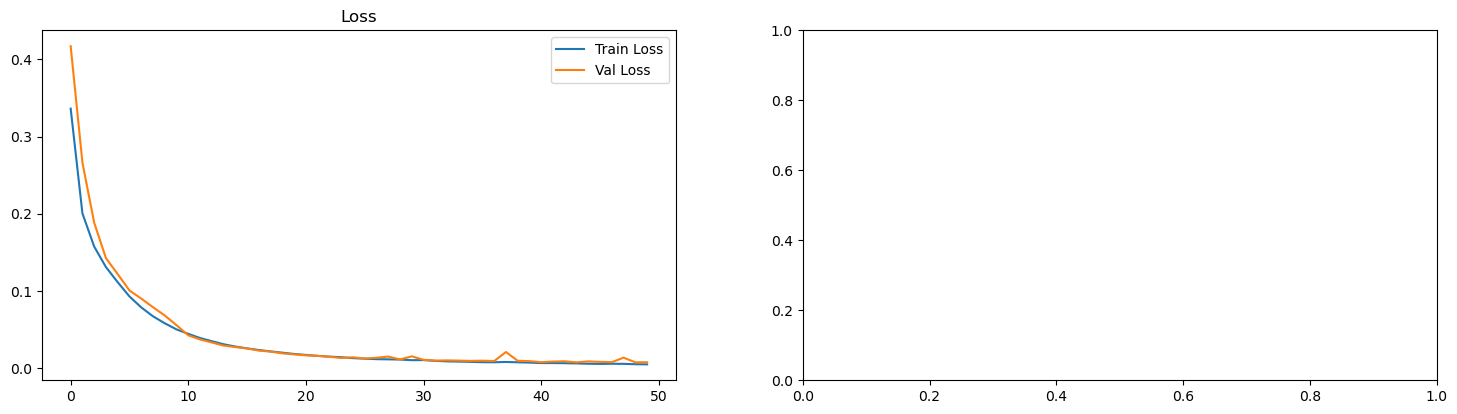

In [ ]:
# ============== IMPORTS & CONFIGURATION ==============
import os
import shutil
import numpy as np
import pydicom
import nibabel as nib
import matplotlib.pyplot as plt
from skimage.transform import resize
from scipy.ndimage import zoom, binary_closing
from skimage.morphology import remove_small_objects
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, metrics
from sklearn.metrics import precision_score, recall_score, jaccard_score, f1_score

# Configuration
DICOM_ROOT = os.path.normpath(r"F:\\skm-tea-data\\Dicom Data")
NIFTI_ROOT = os.path.normpath(r"F:\\skm-tea-data\\Named Raw Segmented Data")
PREPROCESSED_DIR = "preprocessed_meniscus_final"
TARGET_SHAPE = (256, 256)
BATCH_SIZE = 4
EPOCHS = 50
LEARNING_RATE = 3e-4
MENISCUS_CLASS = 2  # Class 2 = medial meniscus in your data

# ============== DATA PROCESSING ==============
def process_patient(dicom_dir, nii_path, output_dir):
    try:
        slices, positions = [], []
        for f in sorted(os.listdir(dicom_dir)):
            if f.lower().endswith('.dcm'):
                ds = pydicom.dcmread(os.path.join(dicom_dir, f))
                if not hasattr(ds, 'ImagePositionPatient'):
                    continue
                slices.append(ds.pixel_array.astype(np.float32))
                positions.append(float(ds.ImagePositionPatient[2]))
        if not slices:
            raise ValueError("No valid DICOM files found")
        _, unique_idx = np.unique(positions, return_index=True)
        volume = np.stack([slices[i] for i in sorted(unique_idx)])
        p2, p98 = np.percentile(volume, (2, 98))
        volume = np.clip((volume - p2) / (p98 - p2 + 1e-8), 0, 1)
        nii = nib.load(nii_path)
        mask = nii.get_fdata()
        mask = np.transpose(mask, (2, 0, 1))
        mask = (mask == MENISCUS_CLASS).astype(np.float32)
        zoom_factor = volume.shape[0] / mask.shape[0]
        mask = zoom(mask, (zoom_factor, 1, 1), order=0)
        mid_idx = volume.shape[0] // 2
        processed_slices = 0
        for slice_idx in range(max(0, mid_idx-2), min(len(volume), mid_idx+3)):
            try:
                img = resize(volume[slice_idx], TARGET_SHAPE).astype(np.float32)
                msk = resize(mask[slice_idx], TARGET_SHAPE, order=0, preserve_range=True)
                msk = binary_closing(msk, structure=np.ones((3,3)))
                msk = remove_small_objects(msk.astype(bool), min_size=10).astype(np.float32)
                if np.sum(msk) < 10:
                    continue
                pid = os.path.basename(dicom_dir)
                np.save(f"{output_dir}/img_{pid}_s{slice_idx}.npy", img)
                np.save(f"{output_dir}/msk_{pid}_s{slice_idx}.npy", msk)
                processed_slices += 1
            except:
                continue
        return processed_slices > 0
    except:
        return False

# ============== DATA GENERATOR ==============
class MeniscusDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, img_paths, mask_paths, augment=True):
        self.img_paths = img_paths
        self.mask_paths = mask_paths
        self.augment = augment
        self.on_epoch_end()
    def __len__(self):
        return len(self.img_paths) // BATCH_SIZE
    def __getitem__(self, idx):
        batch_x = np.zeros((BATCH_SIZE, *TARGET_SHAPE, 1), dtype=np.float32)
        batch_y = np.zeros((BATCH_SIZE, *TARGET_SHAPE, 1), dtype=np.float32)
        for i in range(BATCH_SIZE):
            index = idx * BATCH_SIZE + i
            if index >= len(self.img_paths):
                break
            batch_x[i,...,0] = np.load(self.img_paths[index])
            batch_y[i,...,0] = np.load(self.mask_paths[index])
        if self.augment:
            batch_x, batch_y = self.augment_batch(batch_x, batch_y)
        return batch_x, batch_y
    def augment_batch(self, x, y):
        if np.random.rand() > 0.5:
            x = np.flip(x, axis=2)
            y = np.flip(y, axis=2)
        if np.random.rand() > 0.5:
            x = np.flip(x, axis=1)
            y = np.flip(y, axis=1)
        return x, y
    def on_epoch_end(self):
        indices = np.arange(len(self.img_paths))
        np.random.shuffle(indices)
        self.img_paths = [self.img_paths[i] for i in indices]
        self.mask_paths = [self.mask_paths[i] for i in indices]

# ============== ATTENTION UNET ==============
def attention_gate(x, g, inter_channels):
    theta_x = layers.Conv2D(inter_channels, 1)(x)
    phi_g = layers.Conv2D(inter_channels, 1)(g)
    add = layers.Add()([theta_x, phi_g])
    act = layers.ReLU()(add)
    psi = layers.Conv2D(1, 1, activation='sigmoid')(act)
    return layers.Multiply()([x, psi])

def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def build_attention_unet():
    inputs = layers.Input((*TARGET_SHAPE, 1))
    c1 = conv_block(inputs, 32)
    p1 = layers.MaxPool2D()(c1)
    c2 = conv_block(p1, 64)
    p2 = layers.MaxPool2D()(c2)
    c3 = conv_block(p2, 128)
    p3 = layers.MaxPool2D()(c3)
    c4 = conv_block(p3, 256)
    p4 = layers.MaxPool2D()(c4)
    bn = conv_block(p4, 512)
    g4 = layers.UpSampling2D()(bn)
    att4 = attention_gate(c4, g4, 256)
    u4 = layers.Concatenate()([g4, att4])
    c5 = conv_block(u4, 256)
    g3 = layers.UpSampling2D()(c5)
    att3 = attention_gate(c3, g3, 128)
    u3 = layers.Concatenate()([g3, att3])
    c6 = conv_block(u3, 128)
    g2 = layers.UpSampling2D()(c6)
    att2 = attention_gate(c2, g2, 64)
    u2 = layers.Concatenate()([g2, att2])
    c7 = conv_block(u2, 64)
    g1 = layers.UpSampling2D()(c7)
    att1 = attention_gate(c1, g1, 32)
    u1 = layers.Concatenate()([g1, att1])
    c8 = conv_block(u1, 32)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c8)
    return models.Model(inputs, outputs)

# ============== METRIC VISUALIZATION ==============
def plot_training_metrics(history):
    plt.figure(figsize=(18, 10))
    plt.subplot(2, 2, 1)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Loss'); plt.legend()
    plt.subplot(2, 2, 2)
    plt.plot(history['mean_io_u'], label='Train IoU')
    plt.plot(history['val_mean_io_u'], label='Val IoU')
    plt.title('IoU'); plt.legend()
    plt.subplot(2, 2, 3)
    plt.plot(history['precision'], label='Train Precision')
    plt.plot(history['val_precision'], label='Val Precision')
    plt.title('Precision'); plt.legend()
    plt.subplot(2, 2, 4)
    plt.plot(history['recall'], label='Train Recall')
    plt.plot(history['val_recall'], label='Val Recall')
    plt.title('Recall'); plt.legend()
    plt.tight_layout(); plt.show()

# ============== MAIN ==============
def main():
    if os.path.exists(PREPROCESSED_DIR):
        shutil.rmtree(PREPROCESSED_DIR)
    os.makedirs(PREPROCESSED_DIR, exist_ok=True)
    processed = 0
    for pid in os.listdir(DICOM_ROOT):
        dicom_path = os.path.join(DICOM_ROOT, pid)
        nii_path = os.path.join(NIFTI_ROOT, f"{pid}.nii")
        if os.path.exists(nii_path) and process_patient(dicom_path, nii_path, PREPROCESSED_DIR):
            processed += 1
    print(f"Processed {processed} patients with valid data")

    img_paths = sorted([os.path.join(PREPROCESSED_DIR, f) for f in os.listdir(PREPROCESSED_DIR) if f.startswith("img_")])
    msk_paths = sorted([os.path.join(PREPROCESSED_DIR, f) for f in os.listdir(PREPROCESSED_DIR) if f.startswith("msk_")])
    split = int(0.8 * len(img_paths))
    train_gen = MeniscusDataGenerator(img_paths[:split], msk_paths[:split])
    val_gen = MeniscusDataGenerator(img_paths[split:], msk_paths[split:], augment=False)

    model = build_attention_unet()
    model.compile(
        optimizer=optimizers.Adam(LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=[metrics.MeanIoU(num_classes=2), metrics.Precision(), metrics.Recall()]
    )

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=[
            callbacks.EarlyStopping(patience=15, restore_best_weights=True),
            callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
        ]
    )

    model.save("trained_attention_unet.h5")
    print("Model saved as 'trained_attention_unet.h5'")
    plot_training_metrics(history.history)

    # Evaluation Metrics
    y_true, y_pred = [], []
    for i in range(len(val_gen)):
        x_batch, y_batch = val_gen[i]
        pred = model.predict(x_batch) > 0.5
        y_true.append(y_batch.flatten())
        y_pred.append(pred.flatten())

    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    print(f"DSC (F1):      {f1_score(y_true, y_pred):.4f}")
    print(f"IoU:           {jaccard_score(y_true, y_pred):.4f}")
    print(f"Precision:     {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:        {recall_score(y_true, y_pred):.4f}")

    # Sample Visualization
    for i in np.random.choice(len(val_gen.img_paths), 3, replace=False):
        img = np.load(val_gen.img_paths[i])
        msk = np.load(val_gen.mask_paths[i])
        pred = model.predict(img[np.newaxis, ..., np.newaxis])[0, ..., 0] > 0.5
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))
        axs[0].imshow(img, cmap='gray'); axs[0].set_title("Input Image")
        axs[1].imshow(msk, cmap='gray'); axs[1].set_title("Ground Truth")
        axs[2].imshow(pred, cmap='gray'); axs[2].set_title("Predicted Mask")
        plt.tight_layout(); plt.show()

if __name__ == "__main__":
    main()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


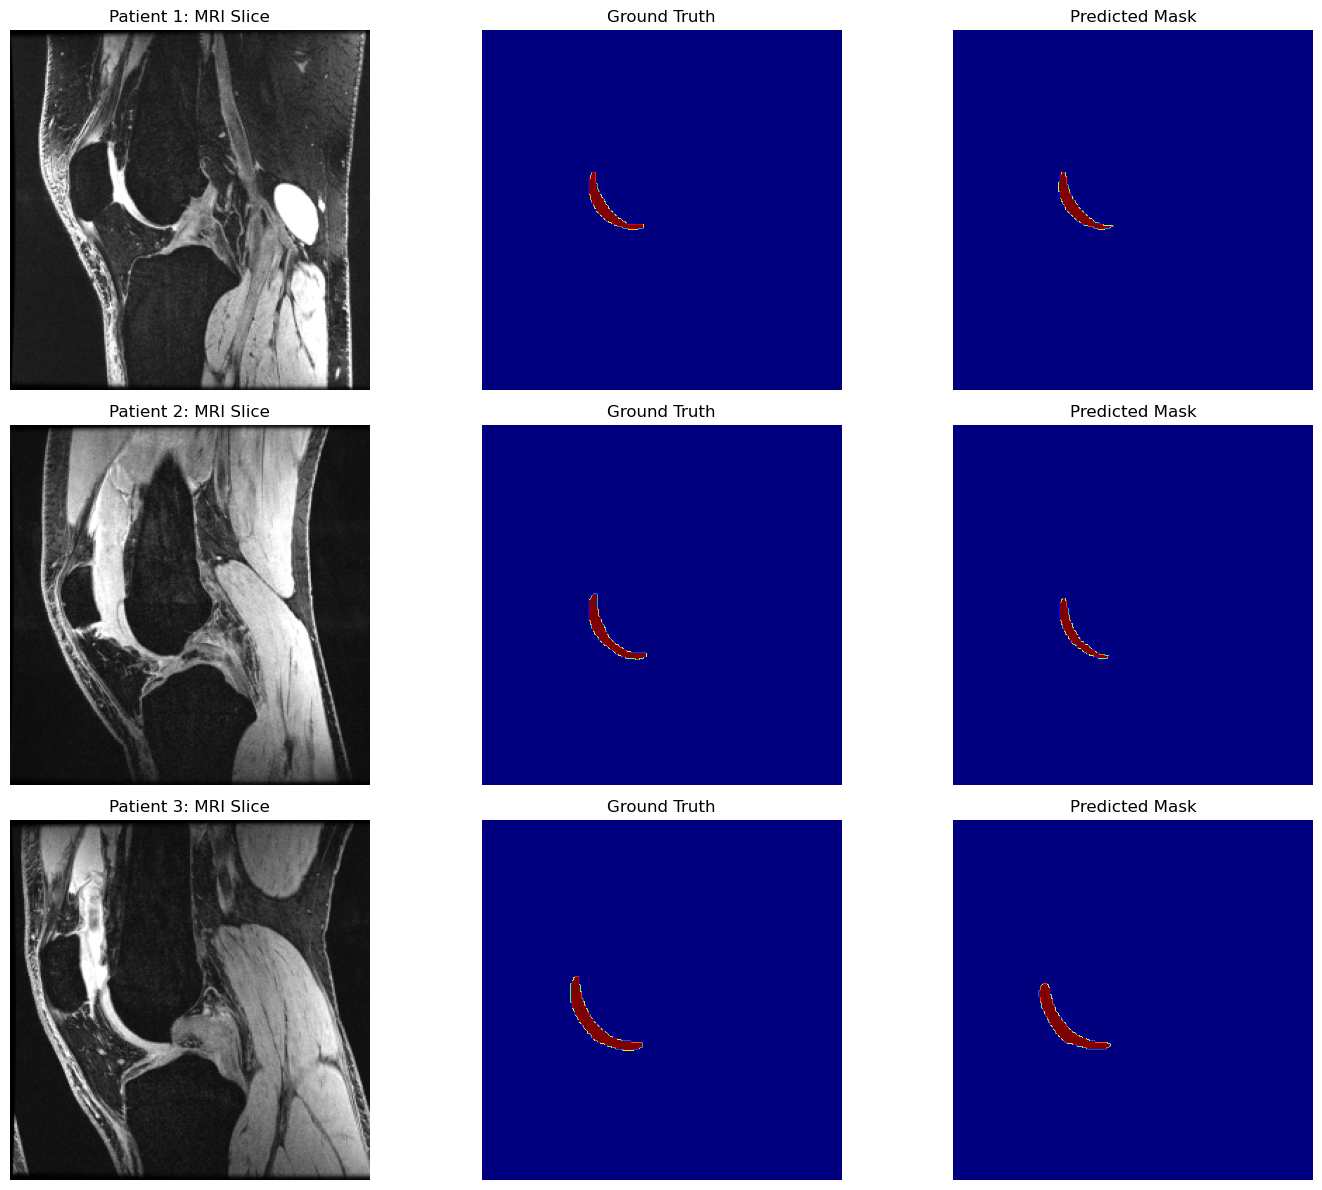

Patient 1 - Dice: 0.9326, IoU: 0.8737, Precision: 0.9365, Recall: 0.9288
Patient 2 - Dice: 0.8448, IoU: 0.7312, Precision: 0.9773, Recall: 0.7438
Patient 3 - Dice: 0.8457, IoU: 0.7326, Precision: 0.8818, Recall: 0.8124


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, jaccard_score

# Paths
PREPROCESSED_DIR = "preprocessed_meniscus_final"
MODEL_PATH = "trained_attention_unet.h5"

# Load model
model = tf.keras.models.load_model(MODEL_PATH, compile=False)

# Load preprocessed data paths
img_paths = sorted([os.path.join(PREPROCESSED_DIR, f) for f in os.listdir(PREPROCESSED_DIR) if f.startswith("img_")])
msk_paths = sorted([os.path.join(PREPROCESSED_DIR, f) for f in os.listdir(PREPROCESSED_DIR) if f.startswith("msk_")])

# Choose 3 sample indices
sample_indices = np.linspace(0, len(img_paths)-1, 3, dtype=int)

# Store and display results
metrics_list = []

plt.figure(figsize=(15, 12))
for i, idx in enumerate(sample_indices):
    img = np.load(img_paths[idx])
    msk_true = np.load(msk_paths[idx])
    pred = model.predict(np.expand_dims(img[..., np.newaxis], axis=0))[0,...,0]
    pred_bin = (pred > 0.5).astype(np.float32)

    # Flatten for metric calculation
    msk_flat = msk_true.flatten()
    pred_flat = pred_bin.flatten()

    # Calculate metrics
    intersection = np.sum(msk_flat * pred_flat)
    dice = (2. * intersection) / (np.sum(msk_flat) + np.sum(pred_flat) + 1e-7)
    iou = jaccard_score(msk_flat, pred_flat)
    precision = precision_score(msk_flat, pred_flat)
    recall = recall_score(msk_flat, pred_flat)
    metrics_list.append((dice, iou, precision, recall))

    # Plot
    plt.subplot(3, 3, i*3+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Patient {i+1}: MRI Slice")
    plt.axis('off')

    plt.subplot(3, 3, i*3+2)
    plt.imshow(msk_true, cmap='jet', vmin=0, vmax=1)
    plt.title("Ground Truth")
    plt.axis('off')

    plt.subplot(3, 3, i*3+3)
    plt.imshow(pred_bin, cmap='jet', vmin=0, vmax=1)
    plt.title("Predicted Mask")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print metrics
for i, (dice, iou, precision, recall) in enumerate(metrics_list):
    print(f"Patient {i+1} - Dice: {dice:.4f}, IoU: {iou:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, jaccard_score

# --- Config ---
PREPROCESSED_DIR = "preprocessed_meniscus_final"
MODEL_PATH = "trained_attention_unet.h5"

# --- Load model ---
model = tf.keras.models.load_model(MODEL_PATH, compile=False)

# --- Load image & mask paths ---
img_paths = sorted([os.path.join(PREPROCESSED_DIR, f) for f in os.listdir(PREPROCESSED_DIR) if f.startswith("img_")])
msk_paths = sorted([os.path.join(PREPROCESSED_DIR, f) for f in os.listdir(PREPROCESSED_DIR) if f.startswith("msk_")])

# --- Split into validation set (assumes 80-20 split) ---
split = int(0.8 * len(img_paths))
val_img_paths = img_paths[split:]
val_msk_paths = msk_paths[split:]

# --- Containers for all predictions and labels ---
all_preds = []
all_labels = []

# --- Predict and accumulate ---
for img_path, msk_path in zip(val_img_paths, val_msk_paths):
    img = np.load(img_path)
    msk = np.load(msk_path)
    pred = model.predict(np.expand_dims(img[..., np.newaxis], axis=0))[0,...,0]
    pred_bin = (pred > 0.5).astype(np.float32)

    all_preds.append(pred_bin.flatten())
    all_labels.append(msk.flatten())

# --- Concatenate all for global evaluation ---
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

# --- Compute metrics ---
intersection = np.sum(all_preds * all_labels)
dice = (2 * intersection) / (np.sum(all_preds) + np.sum(all_labels) + 1e-7)
iou = jaccard_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)

# --- Print results ---
print("=== Overall Validation Set Metrics ===")
print(f"Dice Coefficient (DSC): {dice:.4f}")
print(f"IoU:                    {iou:.4f}")
print(f"Precision:              {precision:.4f}")
print(f"Recall:                 {recall:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Found 71 slices with meniscus (label 4 or 5).


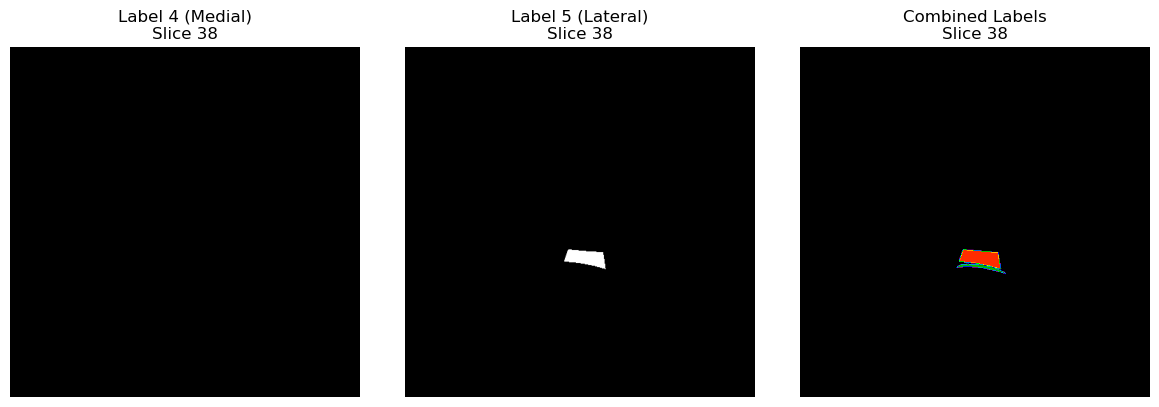

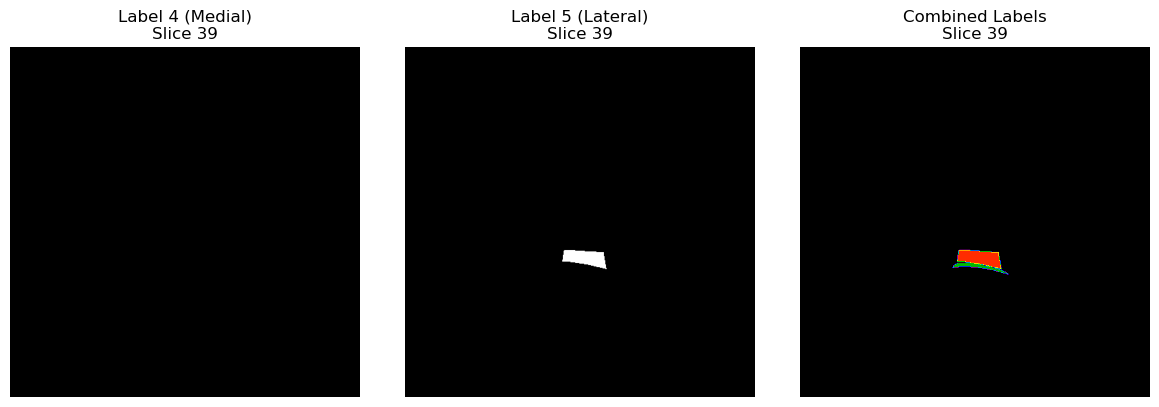

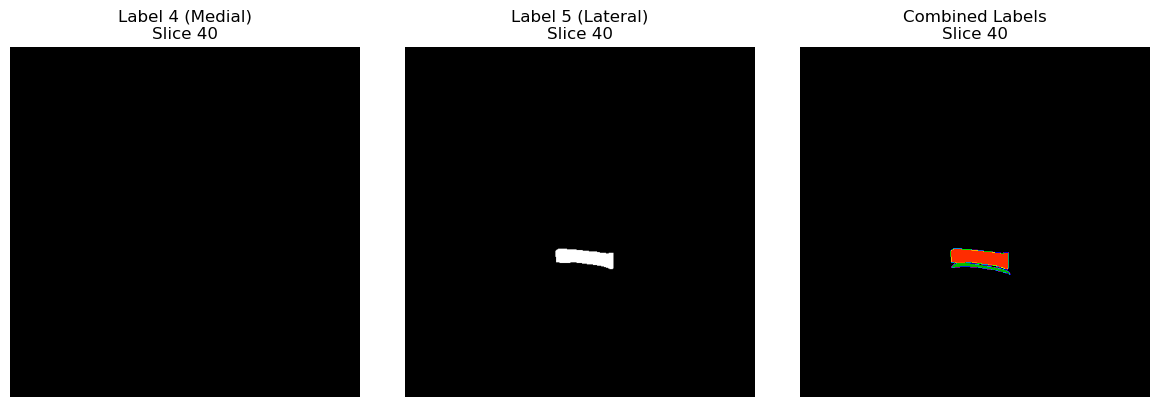

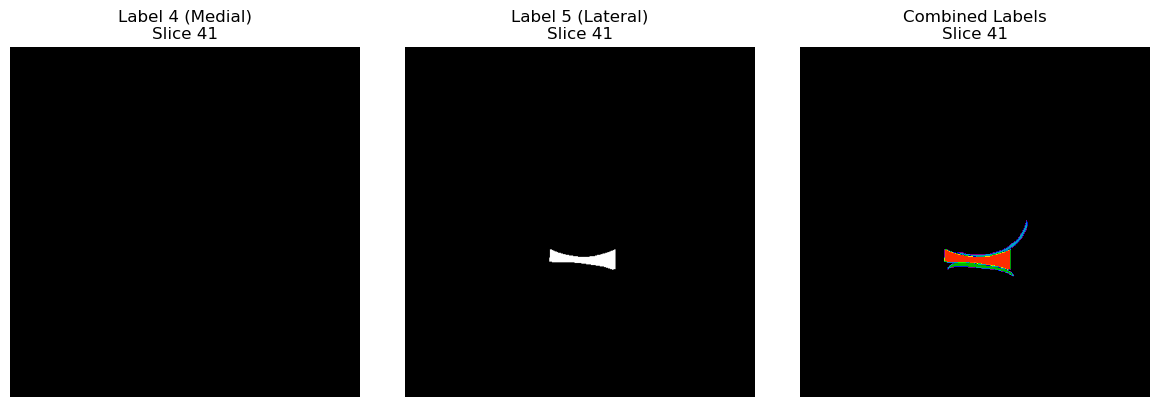

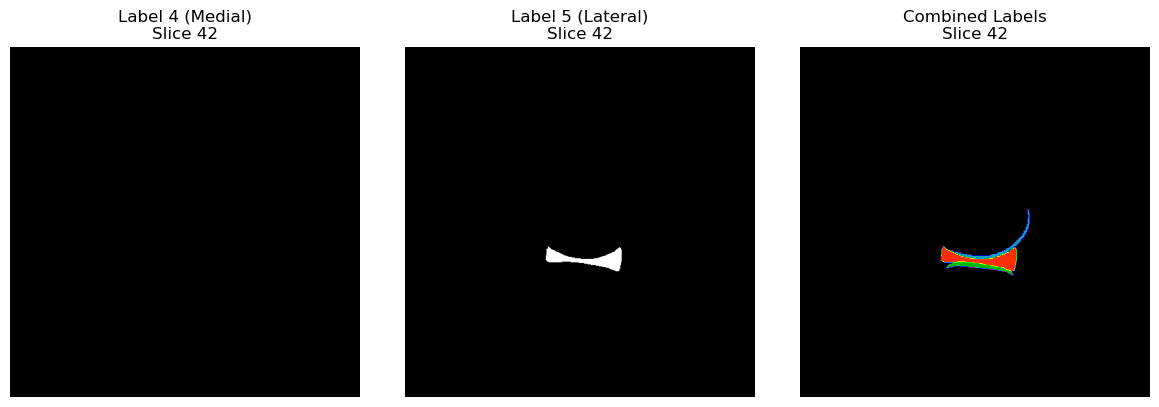

In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Set your dataset root path
NIFTI_ROOT = os.path.normpath(r"F:\\skm-tea-data\\Named Raw Segmented Data")

# Choose a specific scan file to inspect
filename = "MTR_001.nii"  # <- change to any filename in your NIFTI_ROOT
nii_path = os.path.join(NIFTI_ROOT, filename)

# Load the 3D mask
mask = nib.load(nii_path).get_fdata()  # shape: (H, W, Z)

# Search all Z-slices for label 4 (medial meniscus) or 5 (lateral meniscus)
meniscus_slices = []
for z in range(mask.shape[2]):
    if np.any(mask[:, :, z] == 4) or np.any(mask[:, :, z] == 5):
        meniscus_slices.append(z)

print(f"Found {len(meniscus_slices)} slices with meniscus (label 4 or 5).")

# Show up to 5 slices with meniscus
for i, z in enumerate(meniscus_slices[:5]):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(mask[:, :, z] == 4, cmap='gray')
    axs[0].set_title(f"Label 4 (Medial)\nSlice {z}")
    axs[0].axis('off')

    axs[1].imshow(mask[:, :, z] == 5, cmap='gray')
    axs[1].set_title(f"Label 5 (Lateral)\nSlice {z}")
    axs[1].axis('off')

    axs[2].imshow(mask[:, :, z], cmap='nipy_spectral', vmin=0, vmax=6)
    axs[2].set_title(f"Combined Labels\nSlice {z}")
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()
